In [1]:
%% Load demonstrations and define paths
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
dataPath  = '../data/'; % Data path
load([dataPath 'toyExampleMSDstiffnessLearning.mat']);
path(path,'../manifolds');
path(path,'../gmm_gmr');

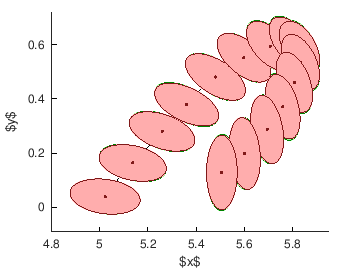

In [3]:
gmrMSD1=figure('position',[10 10 350 270]);
for j=8 %1:n_s_total
    m1=1;
    xR1  = g;
    x1(:,1)   = xR1;
    dx1(:,1)  = zeros(2,1);
    ddx1(:,1) = zeros(2,1);
    f1 = zeros(2,1);
    Fe = dD(j).avgFe;
    for i = round(linspace(2,nbData-2,15))
        Mu(:,:,i) = zeros(2,2);         Mu(1,1,i) = tmpModel(j).Mu(1,i);
        Mu(1,2,i) = tmpModel(j).Mu(2,i);  Mu(2,2,i) = tmpModel(j).Mu(3,i);
        k1 = Mu(:,:,i)' * Mu(:,:,i);
        f1(:,i-1) = k1 * ( xR1 - x1(:,i-1) );
        ddx1(:,i) = (Fe(:,i-1) + f1(:,i-1) - D * dx1(:,i-1)) / m1;
        dx1(:,i)  = dx1(:,i-1) + ddx1(:,i) * dt;
        x1(:,i) = x1(:,i-1) + dx1(:,i) * dt;
    end
    n=1;
    for i = round(linspace(2,nbData-rdp,30))
        x1x(:,n) = x1(:,i);
        n = n+1;
    end
    plot(x1(1,:),x1(2,:),'k','linewidth',2);hold on;
end

clrmap = lines(5);
for j = 8%reprosCHOL
    for i=round(linspace(3,nbData-rdp,15))
        Mu(:,:,i) = zeros(2,2);           Mu(1,1,i) = tmpModel(j).Mu(1,i);
        Mu(1,2,i) = tmpModel(j).Mu(2,i);  Mu(2,2,i) = tmpModel(j).Mu(3,i);
        % Reconstructing stiffness matrix from Cholesky decomposition
        % Kp = k' * k
        Mu(:,:,i) = Mu(:,:,i)' * Mu(:,:,i);    
        plotGMM2([x1(1,i);x1(2,i)], 4E-5*Mu(:,:,i), [0 1 0], .4);
    end
end
for j = 8
    l=1;
    for i=round(linspace(3,nbData-rdp,15))
        Mu(:,:,i) = dD(j).KP(:,:,i);    
        plotGMM2([x1(1,i);x1(2,i)], 4E-5*Mu(:,:,i), [1 0.2 0.2], .4);
        l=l+1;
    end
end
axis([4.8 5.95 -0.09 0.72])
xlabel('$x$', 'Fontsize', 11, 'Interpreter', 'Latex');
ylabel('$y$', 'Fontsize', 11, 'Interpreter', 'Latex');set(gca,'box','off')
set(gca, 'FontSize', 12,'TickLabelInterpreter','latex');


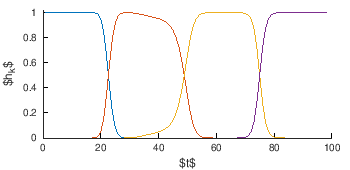

In [4]:
gmmMSD2=figure('position',[10 10 350 170],'color',[1 1 1]);hold on;
for i=1:modelPD.nbStates
    plot(xIn*50, newModelPD(j).H(i,:),'linewidth',2,'color',clrmapMAN_states(i,:));
end
axis([0, 100, 0, 1.02]);
xlabel('$t$', 'Fontsize', 12, 'Interpreter', 'Latex');
ylabel('$h_k$', 'Fontsize', 12, 'Interpreter', 'Latex');

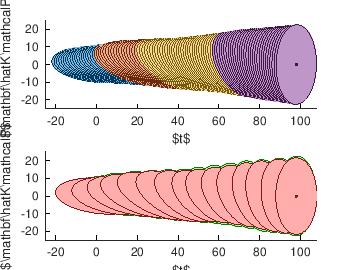

In [7]:
gmrMSD3=figure('position',[10 10 350 270],'color',[1 1 1]);
subplot(2,1,1);hold on
for j = 6%reprosMan
    for i=round(linspace(1,nbData-rdp,100))
        %plotGMM2([xInSPD(1,1,i)*sc; 0], newModelPD(j).Mu(:,:,i), [0 1 0], .1);
        if(i<=26),plotGMM2([xInSPD(1,1,i)*sc; 0], newModelPD(j).Mu(:,:,i), clrmapMAN_states(1,:), .5);end
        if(i>=20 && i<=53),plotGMM2([xInSPD(1,1,i)*sc; 0], newModelPD(j).Mu(:,:,i), clrmapMAN_states(2,:), .5);end
        if(i>=37 && i<=81),plotGMM2([xInSPD(1,1,i)*sc; 0], newModelPD(j).Mu(:,:,i), clrmapMAN_states(3,:), .5);end
        if(i>=69),plotGMM2([xInSPD(1,1,i)*sc; 0], newModelPD(j).Mu(:,:,i), clrmapMAN_states(4,:), .5);end
    end
end
ylabel('$\mathbf{\hat{K}}^\mathcal{P}$', 'Fontsize', 10, 'Interpreter', 'Latex');
xlabel('$t$', 'Fontsize', 12, 'Interpreter', 'Latex');
set(gca, 'FontSize', 12,'TickLabelInterpreter','latex');
axis([-25, DataK(1,end)*sc+10, -25, 25]);

subplot(2,1,2);hold on
for j = 6%reprosMan
    for i=round(linspace(3,nbData-rdp,15))
        plotGMM2([xInSPD(1,1,i)*sc; 0], newModelPD(j).Mu(:,:,i), [0 1 0], .4);
    end
end
for j = 6%reprosMan
    for i=round(linspace(3,nbData-rdp,15))
        plotGMM2([xInSPD(1,1,i)*sc; 0], Mu(:,:,i), [1 0.2 0.2], .4);
    end
end
ylabel('$\mathbf{\hat{K}}^\mathcal{P}$', 'Fontsize', 10, 'Interpreter', 'Latex');
xlabel('$t$', 'Fontsize', 11, 'Interpreter', 'Latex');
axis([-25, DataK(1,end)*sc+10, -25, 25]);
set(gca, 'FontSize', 12,'TickLabelInterpreter','latex');
